# Overview

Introduction: Loan is a major source of income for bank, while lending banks go through necessary verification process by evaluating the client, their demographics, credit history, loan amount in order to decide wheather or not to approve the loan.

This process of identifying wheather to approve loan or not can be solved using ML in modern times using classification.

Data Source: This data is downloaded from Kaggle. The data set used is having 13 columns and 615 rows.

Columns:
Loan_ID = Unique Id Assigned to customers, object data type, independent variable
Gender = Male, Female, object data type, independent variable
Married = Maritial status, object data type, independent variable
Dependents = Number of dependent count, object data type, independent variable
Education = Graduate, Not Graduate, object data type, independent variable
Self_Employed = Yes, No, object data type, independent variable
Applicantincome = Income, Int data type, independent variable
Coapplicantincome = coapplicant income, int datatype, independent variable
LoanaAmount = Loan amount, int data type, independent variable 
Loan_Amount_Term = Days for which loan is taken, int data type, independent variable
Credit_History = 1 indicates credit paid, 0 indicates loan not paid previously, int data type, independent variable
Property_Area = Area in which the propert is located namely urban or rural, independent variable
Loan_Status = Loan is approved or not 'Y'= Approved, 'N' = Not Approved, Dependent Variable

This jupyter notebook has the source code for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset=pd.read_csv('Loan_Data.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.shape

(614, 13)

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Filling Null Values

Filling null values is an important step as it ensures our model works properly and does not throw error
Object data type should be filled with mode 
Int data type should be filled with mean however if the columns have outliers then it should be filled using median, since mean is sensitive to outliers.

In [6]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

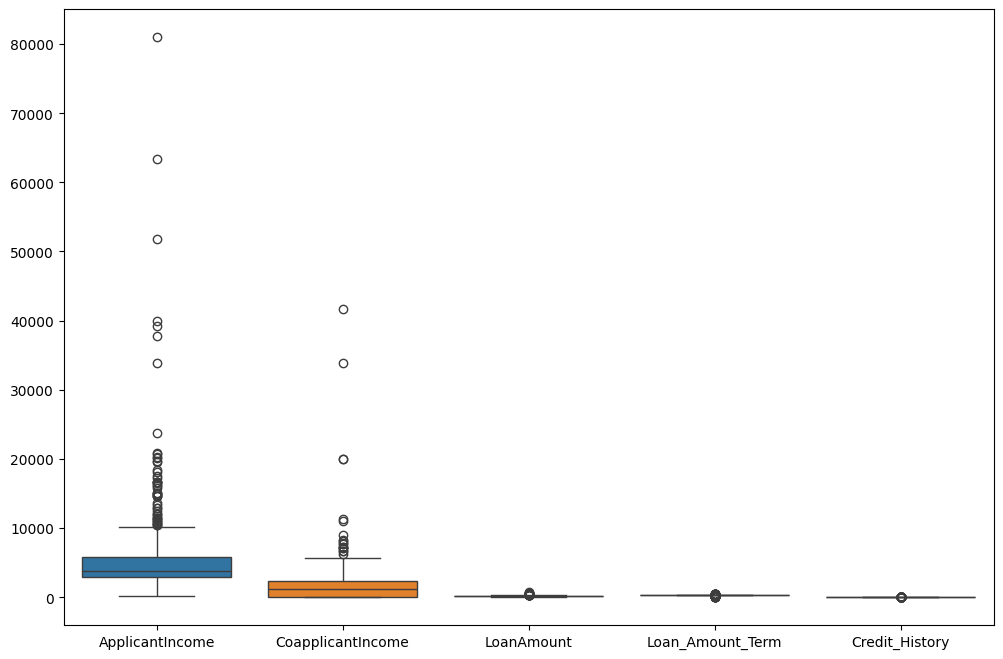

In [7]:
## Checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data= dataset)

In [8]:
# Fill null values of numeric data type
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mean())

In [9]:
# Filling null values of object data type
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [10]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

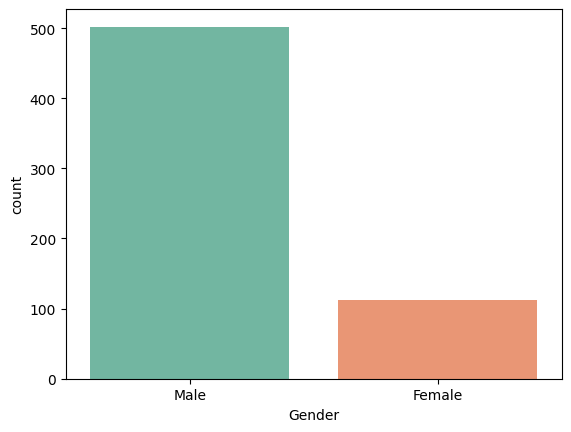

In [11]:
print("Number of people who took loan by gender")
print(dataset['Gender'].value_counts())
sns.countplot(x='Gender', data = dataset, palette='Set2')

Number of people who took loan by maritial status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

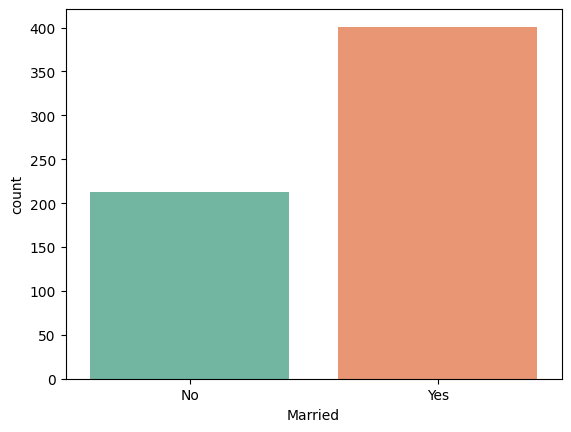

In [12]:
print('Number of people who took loan by maritial status')
print(dataset['Married'].value_counts())
sns.countplot(x='Married', data=dataset, palette='Set2')

Number of people who took loan based on education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

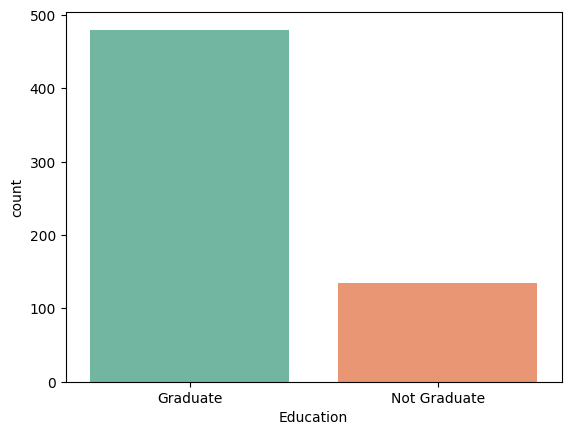

In [13]:
print("Number of people who took loan based on education")
print(dataset['Education'].value_counts())
sns.countplot(x='Education', data=dataset, palette='Set2')

# Feature Engineering

In [14]:
dataset['Total_Income']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='Applicant_Income_Log', ylabel='Density'>

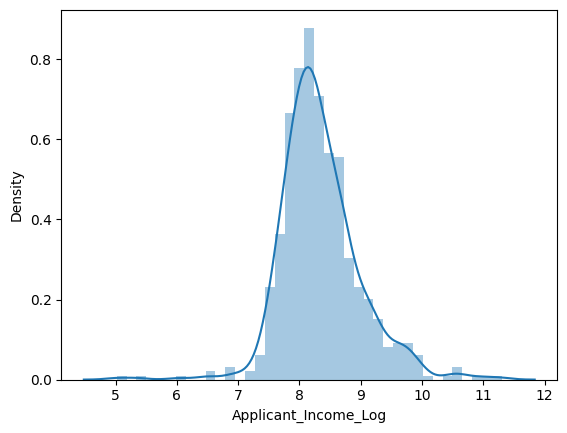

In [15]:
# Log Transforamation(Normalization)
dataset['Applicant_Income_Log']=np.log(dataset['ApplicantIncome']+1)
sns.distplot(dataset['Applicant_Income_Log'])

<Axes: xlabel='Loan_Amount_Log', ylabel='Density'>

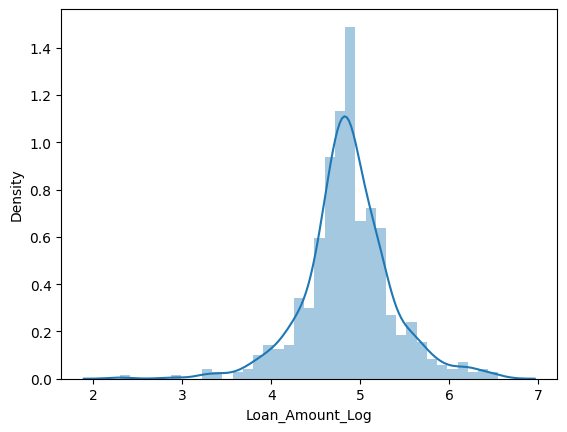

In [16]:
dataset['Loan_Amount_Log']=np.log(dataset['LoanAmount']+1)
sns.distplot(dataset['Loan_Amount_Log'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

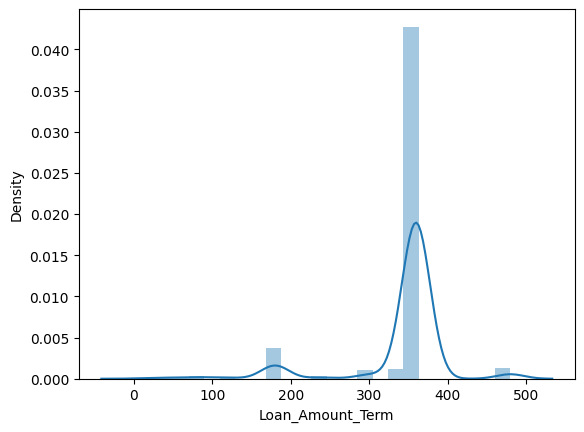

In [17]:
dataset['Loan_Amount_Term_Log']=np.log(dataset['Loan_Amount_Term'])+1
sns.distplot(dataset['Loan_Amount_Term'])


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

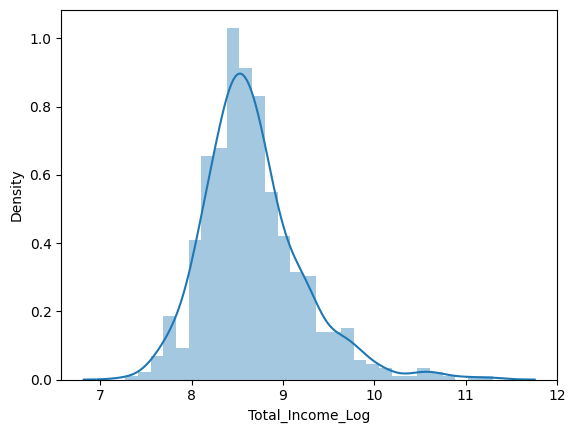

In [18]:
dataset['Total_Income_Log']=np.log(dataset['Total_Income']+1)
sns.distplot(dataset['Total_Income_Log'])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

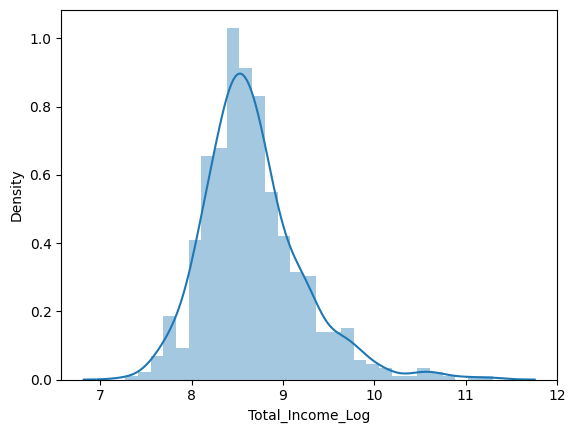

In [19]:
dataset['Total_Income_Log']=np.log(dataset['Total_Income']+1)
sns.distplot(dataset['Total_Income_Log'])

In [20]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,6.886104,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,6.886104,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,6.886104,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,6.886104,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,6.886104,8.699681


In [21]:
# Drop unnecessary columns
cols=['CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID','Total_Income']
dataset=dataset.drop(columns=cols,axis=1)
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,6.886104,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,6.886104,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,6.886104,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,6.886104,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,6.886104,8.699681


In [22]:
# Encoding
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    dataset[col]=le.fit_transform(dataset[col])

In [23]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,6.886104,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,6.886104,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,6.886104,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,6.886104,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,6.886104,8.699681


In [24]:
dataset.dtypes

Gender                    int32
Married                   int32
Dependents                int32
Education                 int32
Self_Employed             int32
Credit_History          float64
Property_Area             int32
Loan_Status               int32
Applicant_Income_Log    float64
Loan_Amount_Log         float64
Loan_Amount_Term_Log    float64
Total_Income_Log        float64
dtype: object

In [25]:
# Splitting Dependent and Independent features
x=dataset.drop(columns=['Loan_Status'],axis=1)
y=dataset['Loan_Status']

In [26]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,6.886104,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,6.886104,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,6.886104,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,6.886104,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,6.886104,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,6.886104,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,6.192957,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,6.886104,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,6.886104,8.933796


In [27]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# Training the Model

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [53]:
## Logistic Regression
model1= LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1= model1.predict(x_test)
accuracy= accuracy_score(y_test,y_pred_model1)

In [54]:
accuracy*100

77.27272727272727

In [55]:
score= cross_val_score(model1,x,y,cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [56]:
# Decision Tree Classifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2=model2.predict(x_test)
accuracy=accuracy_score(y_pred_model2,y_test)
print('Accuracy Score of Decision Tree Model',accuracy*100)

Accuracy Score of Decision Tree Model 70.77922077922078


In [57]:
# Cross Validation score for Decision Tree Model
score= cross_val_score(model2,x,y,cv=5)
print('Cross validation score for decision tree:', np.mean(score)*100)

Cross validation score for decision tree: 70.03465280554447


In [58]:
## Random Forest Classifier
model3= RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3=model3.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_model3)
print('Accuracy score of random forest classifier is:', accuracy*100)
# Cross validation is not checked for Random Forest Classifier

Accuracy score of random forest classifier is: 77.92207792207793


In [60]:
## K neighbor Classifier
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_pred_model4=model4.predict(x_test)
accuracy=accuracy_score(y_pred_model4,y_test)
print('Accuracy Score of K Neighbor Classifier is:', accuracy*100)

Accuracy Score of K Neighbor Classifier is: 71.42857142857143


In [61]:
score=cross_val_score(model4,x,y,cv=5)
print('cross validation score of K neighbor is:', np.mean(score)*100)

cross validation score of K neighbor is: 73.61721977875517


In [ ]:
# Logistic Regression is giving a good accuracy score

In [63]:
# Checking Precision recall and accuracy 
from sklearn.metrics import classification_report
def generate_classification_report(model_name,y_test,y_pred):
    report=classification_report(y_test,y_pred)
    print(f'Classification Report for: {model_name}:\n{report}')
generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

Classification Report for: LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

Classification Report for: DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.60      0.48      0.54        54
           1       0.75      0.83      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154

Classification Report for: RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.88      0.43      0.57        54
           1       0.76      0.97      0.85       100

    accuracy               

In [ ]:
# From this analysis since the values have a lot difference then there must be overfitting of dataset 

In [64]:
dataset['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

# Balancing the Dataset

In [65]:
pip install u imbalanced-learn


                                              0.0/258.3 kB ? eta -:--:--
     ----------------                       112.6/258.3 kB 3.3 MB/s eta 0:00:01
     ----------------                       112.6/258.3 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00


In [67]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
oversample=RandomOverSampler(random_state=42)
x_resampled,y_resampled= oversample.fit_resample(x,y)
dataset_resampled=pd.concat([pd.DataFrame(x_resampled,columns=x.columns),pd.Series(y_resampled,name='Loan_Status')],axis=1)

In [70]:
x_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,6.886104,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,6.886104,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,6.886104,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,6.886104,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,6.886104,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,6.192957,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,6.886104,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,6.886104,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,6.192957,7.969012


In [71]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [72]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [74]:
x_resampled_train,x_resampled_test,y_resampled_train,y_resampled_test=train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=42)

In [78]:
## Logistic Regression
model1= LogisticRegression()
model1.fit(x_resampled_train,y_resampled_train)
y_pred_model1= model1.predict(x_resampled_test)
accuracy= accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

69.66824644549763

In [79]:
# Decision Tree Classifier
model2=DecisionTreeClassifier()
model2.fit(x_resampled_train,y_resampled_train)
y_pred_model2=model2.predict(x_resampled_test)
accuracy=accuracy_score(y_pred_model2,y_resampled_test)
print('Accuracy Score of Decision Tree Model',accuracy*100)

Accuracy Score of Decision Tree Model 80.56872037914692


In [81]:
## Random Forest Classifier
model3= RandomForestClassifier()
model3.fit(x_resampled_train,y_resampled_train)
y_pred_model3=model3.predict(x_resampled_test)
accuracy=accuracy_score(y_resampled_test,y_pred_model3)
print('Accuracy score of random forest classifier is:', accuracy*100)
# Cross validation is not checked for Random Forest Classifier

Accuracy score of random forest classifier is: 88.15165876777252


In [82]:
## K neighbor Classifier
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(x_resampled_train,y_resampled_train)
y_pred_model4=model4.predict(x_resampled_test)
accuracy=accuracy_score(y_pred_model4,y_resampled_test)
print('Accuracy Score of K Neighbor Classifier is:', accuracy*100)

Accuracy Score of K Neighbor Classifier is: 72.51184834123224


In [84]:
# Checking Precision recall and accuracy 
from sklearn.metrics import classification_report
def generate_classification_report(model_name,y_test,y_pred):
    report=classification_report(y_test,y_pred)
    print(f'Classification Report for: {model_name}:\n{report}')
generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

Classification Report for: LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211

Classification Report for: DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       114
           1       0.82      0.74      0.78        97

    accuracy                           0.81       211
   macro avg       0.81      0.80      0.80       211
weighted avg       0.81      0.81      0.80       211

Classification Report for: RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.91      0.88        97

    accuracy               

In [85]:
# The classification is now giving better results since the dataset is now balanced